### Before submitting the assignment, add your UNCC username to the end of the file name.<br>Ex: ITCS3162_final_hw_jmelto30.ipynb

# Part 1: Classification

For this assignment, you will fit classification models to predict the political party of U.S. Representatives using past voting records.  

The dataset for this analysis is *voting_data.csv*.

The **Class Name** column contains the political party for each representative, which will be our label column for this analysis.  
The remaining columns will form our feature set.

## Read in the data

In the code cell below, read the voting data into a pandas dataframe.

In [55]:
import pandas as pd
dataFrame = pd.read_csv('voting_data.csv')
dataFrame.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


## Clean up the data

Encode features as numeric values:
- Replace 'y' votes with 1
- Replace 'n' votes with 0
- Replace '?' votes with NaN (use np.nan)

In [56]:
import numpy as np
replacing = ['y','n','?']
replace_as = ['1', '0', np.nan]
dataFrame = dataFrame.replace(replacing,replace_as)
dataFrame.head()


,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0,1,0,1,1,1,0,0,0,1,NaN,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,NaN
2,democrat,NaN,1,1,NaN,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,NaN,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,NaN,1,1,1,1


Encode labels as numeric values:
- Replace 'republican' with 1
- Replace 'democrat' with 0

In [57]:
replacing = ['republican', 'democrat']
replace_as = ['1','0']
dataFrame = dataFrame.replace(replacing,replace_as)
dataFrame.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,1,0,1,0,1,1,1,0,0,0,1,NaN,1,1,1,0,1
1,1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,NaN
2,0,NaN,1,1,NaN,1,1,0,0,0,0,1,0,1,1,0,0
3,0,0,1,1,0,NaN,1,0,0,0,0,1,0,1,0,0,1
4,0,1,1,1,0,1,1,0,0,0,0,1,NaN,1,1,1,1


## Handling missing values

Replace the missing values with a third category (use 2).

In [58]:
dataFrame = dataFrame.replace(np.nan, '2')
dataFrame.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,1,0,1,0,1,1,1,0,0,0,1,2,1,1,1,0,1
1,1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,2
2,0,2,1,1,2,1,1,0,0,0,0,1,0,1,1,0,0
3,0,0,1,1,0,2,1,0,0,0,0,1,0,1,0,0,1
4,0,1,1,1,0,1,1,0,0,0,0,1,2,1,1,1,1


**Question:** What do missing values in this dataset represent? Why does retaining the missing values as a third category make sense for this data?

Missing values in this dataset represent that members of the house have not made a decision or have not voted on the issue (determined by column name). It is important to retain the missing values as a third category because when observing the data in its entirety, there is an assumption that if that missing value had a value, it would be significant to the data and therefore have a potential change in the dataset itself. By having that assignment of a missing value to be two, we are including those missing values for data anaylsis; spotting trends and issues that data would have before missing data, and potentially after the missing data are filled.

## Split the data into feature and label sets

Create feature and label sets of data with the appropriate columns.

In [59]:
#the feature set, x, that i want to use to determine Y

X = dataFrame.drop(['Class Name'], axis = 1) #the entire column of class names are removed, and captial x is all other than class name

#the label set that is being determined from x
y = dataFrame['Class Name']

X

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0,1,0,1,1,1,0,0,0,1,2,1,1,1,0,1
1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,2
2,2,1,1,2,1,1,0,0,0,0,1,0,1,1,0,0
3,0,1,1,0,2,1,0,0,0,0,1,0,1,0,0,1
4,1,1,1,0,1,1,0,0,0,0,1,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,0,0,1,1,1,1,0,0,1,1,0,1,1,1,0,1
431,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,1
432,0,2,0,1,1,1,0,0,0,0,1,1,1,1,0,1
433,0,0,0,1,1,1,2,2,2,2,0,1,1,1,0,1


## Divide features and labels into training and test sets

Split the features and labels into training and test datasets.  
Use 20% of the data as a test set.

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)
X_train

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
101,1,0,1,0,1,1,1,0,0,0,1,0,0,1,0,1
108,1,2,1,0,0,0,1,1,1,0,0,0,0,0,1,2
322,1,1,1,0,2,1,0,2,0,0,1,0,1,1,0,2
123,1,2,0,1,1,1,0,1,0,0,0,1,1,1,0,1
321,1,1,1,0,0,0,1,1,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,0,1,0,1,1,1,0,2,0,0,2,2,2,1,0,2
118,0,1,1,0,0,0,0,1,1,1,1,0,0,0,1,1
189,1,0,1,0,0,0,1,1,1,0,0,0,0,0,1,1
206,0,0,0,1,1,1,0,0,0,1,0,1,0,1,0,1


## Fit Decision Tree classifier

Initialize and fit a Decision Tree classifier on your training dataset.

In [61]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train,y_train)

y_predictions_tree = clf_tree.predict(X_test)

## Evaluate Decision Tree classifier

Use cross validation on your entire dataset (see [cross validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) or [cross val score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) documentation) to report the mean F1, precision, and recall scores across all folds.

In [62]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

print(metrics.classification_report(y_test, y_predictions_tree))

dt_score_tree_f1 = cross_val_score(clf_tree, X, y, cv = 9, scoring = 'f1_macro')
#getting the mean f1 score
mean_dt_score_tree_f1 = round(dt_score_tree_f1.mean(),3)
print('The mean F1 Score: ', mean_dt_score_tree_f1)

dt_score_tree_pr = cross_val_score(clf_tree, X, y, cv = 9, scoring = 'precision_macro')
mean_dt_score_tree_pr = round(dt_score_tree_pr.mean(),3)
print('The mean precision score: ', mean_dt_score_tree_pr)

dt_score_tree_rc = cross_val_score(clf_tree, X, y, cv = 9, scoring = 'recall_macro')
mean_dt_score_tree_rc = round(dt_score_tree_rc.mean(),3)
print('The mean recall score: ', mean_dt_score_tree_rc)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        53
           1       0.93      0.79      0.86        34

    accuracy                           0.90        87
   macro avg       0.91      0.88      0.89        87
weighted avg       0.90      0.90      0.89        87

The mean F1 Score:  0.953
The mean precision score:  0.968
The mean recall score:  0.954


## Fit Naive Bayes classifier

**Question:** Look at scikit learn's documentation for [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html) and the lecture slides for Naive Bayes. Given the data type of our feature columns, which type of Naive Bayes classifier is appropriate for our dataset?

I believe that for this type of data set provided, Categorical Naive Bayes. It is a newly added addition of naive bayes classifiers, and if not, the next best would have been multinomial due to the fact that some attributes include features of two. Categorical naive bayes makes a more direct approach for classifications for features that are discreet. Since the data is being worked with in its entirety, the data has features that diverge from the usual binary way of yes and no.

the categorical NB was used after updating all of anaconda.

Initialize and fit a Naive Bayes classifier on your training dataset. 

In [63]:
from sklearn.naive_bayes import CategoricalNB

test_cat = CategoricalNB()
test_cat.fit(X_train, y_train)

test_prediction_cat = test_cat.predict(X_test)


## Evaluate Naive Bayes classifier

Use cross validation on your entire dataset (see [cross validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) or [cross val score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) documentation) to report the mean F1, precision, and recall scores across all folds.

In [64]:
print(metrics.classification_report(y_test, test_prediction_cat))

nb_score_f1 = cross_val_score(clf_tree, X, y, cv = 9, scoring = 'f1_macro')
#getting the mean f1 score
mean_nb_tree_f1 = round(nb_score_f1.mean(),3)
print('The mean F1 Score: ', mean_nb_tree_f1)

nb_score_pr = cross_val_score(clf_tree, X, y, cv = 9, scoring = 'precision_macro')
mean_nb_tree_pr = round(nb_score_pr.mean(),3)
print('The mean precision score: ', mean_nb_tree_pr)

nb_score_rc = cross_val_score(clf_tree, X, y, cv = 9, scoring = 'recall_macro')
mean_nb_score_rc = round(nb_score_rc .mean(),3)
print('The mean recall score: ', mean_nb_score_rc)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        53
           1       0.85      0.85      0.85        34

    accuracy                           0.89        87
   macro avg       0.88      0.88      0.88        87
weighted avg       0.89      0.89      0.89        87

The mean F1 Score:  0.958
The mean precision score:  0.958
The mean recall score:  0.949


**Question:** Which classifier model performed better on the voting dataset? Why do you think this is?

From looking at the data set, it looks like the decision tree performed better than the naive bayes classifiers. One of the main reasons I suppose that the decision tree did better was because of the fact that because there was an unknown variable value, the '2', the probability calulation between multiple categorical features, the '2' probably caused some bias inside of the calculations

## *Bonus*

Predict the class label using your test dataset with both models.

Report the classification report and accuracy for your model. See [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) and [accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

**Question:** Which classifier model performed better on the test dataset?

***

# Part 2: Regression

For this assignment, you will fit regression models to predict the daily count of bike riders.

The dataset for this analysis is *day_clean.csv*.

The **cnt** column contains the total count of bike riders on a given day, which will be our label column for this analysis.

## Read in the data

In the code cell below, read the daily bike data into a pandas dataframe.

In [65]:
bike_db = pd.read_csv('day_clean.csv')
bike_db.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


## Individual feature selection

Choose three columns from the dataset that you think will be the best predictors of bike ridership count.  
Look at the *Readme.txt* for more information about the dataset.

**Question:** Justify why you selected these three columns.

The three columns that would be the best predictors for bike ridership count are:
weathersit(weather situation), you would need to know the weather condition if it's safe to ride outside, ie. rain, cloudy, etc
weekday, most people follow a 3-6 day/week routine. if the person is working on a weekday, then liekly not ride, otherwise would.
temperature, obviously not going to go ride a bike when it's 20 below or some might go when the sun is going to melt off your face.

## Split the data into feature and label sets

Create a labels dataset.  
Create your three single feature sets using each of the three columns you have selected.

In [66]:

feature = bike_db.drop(['cnt'], axis = 1)
X1 = feature['temp'].values.reshape(-1,1) 
X2 = feature['weathersit'].values.reshape(-1,1)
X3 = feature['weekday'].values.reshape(-1,1)

y = bike_db['cnt']

## For each single feature set, divide the features and labels into training and test sets

Split the feature and label sets into training and test sets.  
Use 20% of the data as a test set.

In [67]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size = 0.2, random_state = 5)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size = 0.2, random_state = 5)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size = 0.2, random_state = 5)

## Fit simple Linear Regression models

For each of your single feature sets, initialize and fit a Linear Regression model on your training dataset.

In [82]:
from sklearn.linear_model import LinearRegression

temp_model = LinearRegression().fit(X1_train, y1_train)
y1_pred = temp_model.predict(X1_test)

weather_model = LinearRegression().fit(X2_train, y2_train)
y2_pred = temp_model.predict(X2_test)

day_model = LinearRegression().fit(X3_train, y3_train)
y3_pred = temp_model.predict(X3_test)

## Evaluate simple Linear Regression models

For each model, predict the ridership count using your test dataset.  
Report the mean squared error for each model on the test dataset. See [mean squared error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) documentation.

Temperature mean squared error: 2109448.621242567
Weather Situation mean squared error: 59352031.89625304
Weekday mean squared error: 450861853.7025571


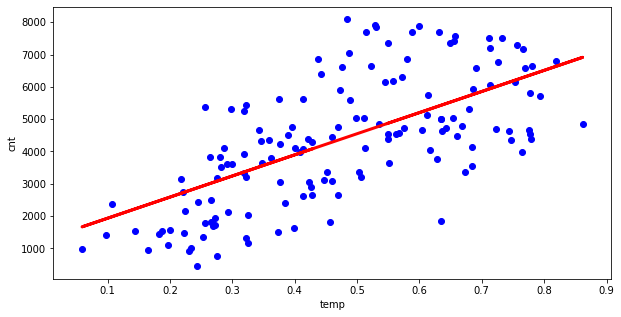

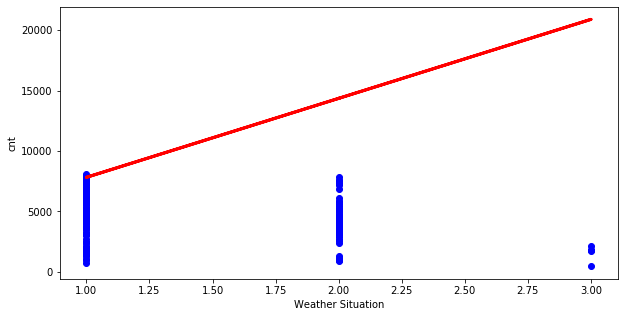

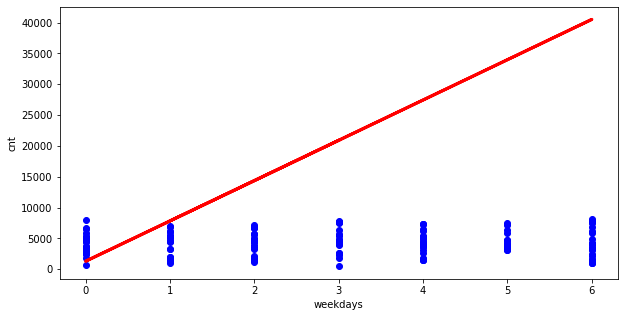

In [83]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
plt.figure(figsize = (10,5))
plt.xlabel('temp')
plt.ylabel('cnt')
plt.scatter(X1_test, y1_test, color='blue')
plt.plot(X1_test, y1_pred, color = 'red', linewidth = 3)
temp_mse = mean_squared_error(y1_test, y1_pred)
print('Temperature mean squared error: {}'.format(temp_mse)) #i don't know why the large number but temperature is the best regressor feature of the three chosen

plt.figure(figsize = (10,5))
plt.xlabel('Weather Situation')
plt.ylabel('cnt')
plt.scatter(X2_test, y2_test, color='blue')
plt.plot(X2_test, y2_pred, color = 'red', linewidth = 3)
temp_mse = mean_squared_error(y2_test, y2_pred)
print('Weather Situation mean squared error: {}'.format(temp_mse))

plt.figure(figsize = (10,5))
plt.xlabel('weekdays')
plt.ylabel('cnt')
plt.scatter(X3_test, y3_test, color='blue')
plt.plot(X3_test, y3_pred, color = 'red', linewidth = 3)
temp_mse = mean_squared_error(y3_test, y3_pred)
print('Weekday mean squared error: {}'.format(temp_mse))


## Simple Linear Regression scatterplot

Using the best predictive feature from your simple Linear Regression models, plot a scatterplot of that feature vs. the ridership count.  

***Bonus:*** Include the best-fit line from your model in your scatterplot.

## Multiple Linear Regression

Create a feature set using all predictor columns.

In [90]:
X = feature

## Divide the feature set and labels into training and test sets

Split the features and labels into training and test datasets.  
Use 20% of the data as a test set.

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

## Fit multiple Linear Regression model

Initialize and fit a Linear Regression model on your training dataset.

In [92]:
multi_regressor_model = LinearRegression().fit(X_train, y_train)
y_pred = multi_regressor_model.predict(X_test)

## Evalute multiple Linear Regression model

Predict the ridership count using your test dataset.  
Report the mean squared error of your model on the test dataset. See [mean squared error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) documentation.

the mse using all features: 807850.589735677


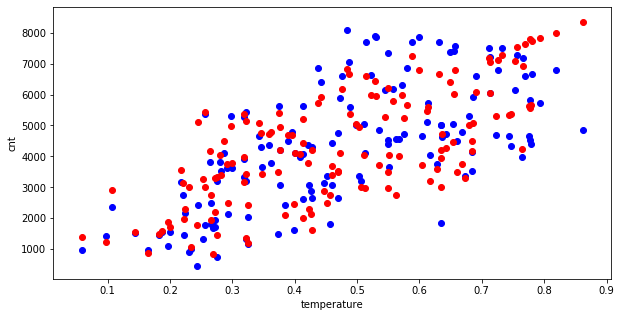

In [102]:
plt.figure(figsize = (10,5))
plt.xlabel('temperature')
plt.ylabel('cnt')

plt.scatter(X_test['temp'], y_test, color = 'blue') #actual
plt.scatter(X_test['temp'], y_pred, color = 'red') #predictions

overall_mse = mean_squared_error(y_test,y_pred)
print('the mse using all features: {}'.format(overall_mse)) #mse is mean squared erro

**Question:** Which of your models performed best overall?

temperature was the best predictor of the number of people who decide to ride bikes based on a certain point inf time, with the right weather conditions.